In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

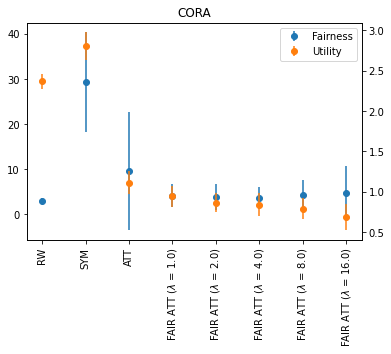

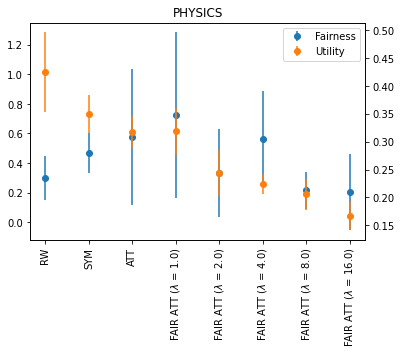

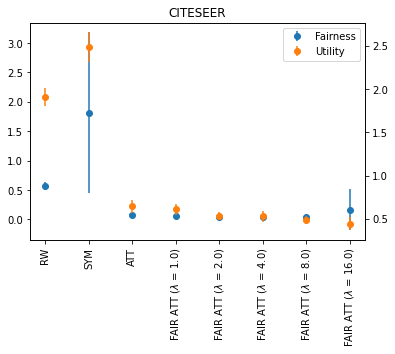

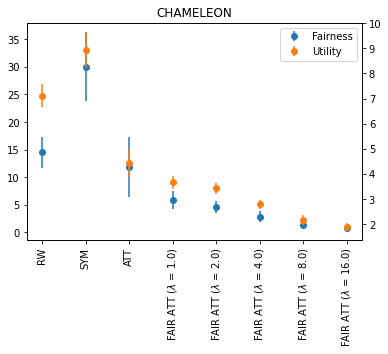

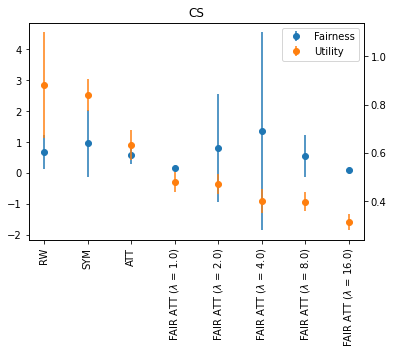

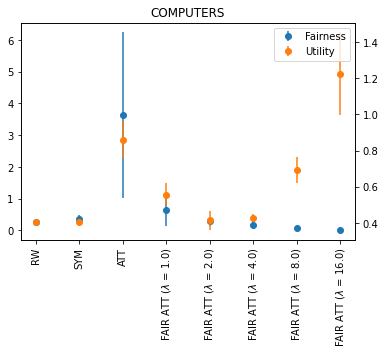

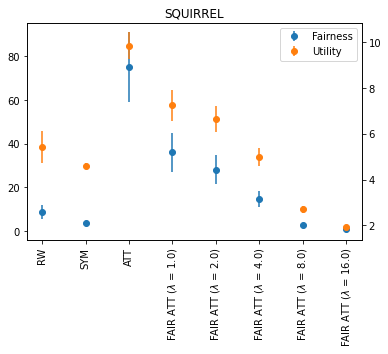

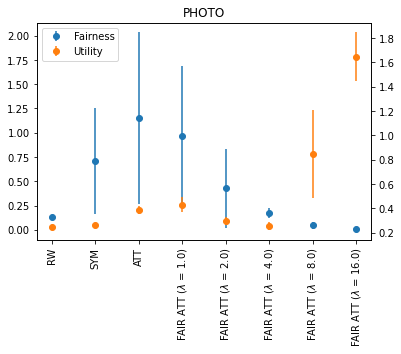

In [2]:
for file in glob.glob("results/*.csv"):
    dataset_name = file.split('.csv')[0].split('/')[1].split('_')[0].upper()
    
    df = pd.read_csv(file, header=None)
    
    fairness_res = {}
    util_res = {}
    
    for i, g in df.groupby(np.arange(len(df)) // 2):
        fr = g.iloc[0]
        ur = g.iloc[1]
        
        mt = fr[0]
        
        fm, um = fr[2], ur[2]
        fs, us = fr[3], ur[3]
        
#         if mt.startswith('FAIR ATT'):
#             curr_key = None
#             for k in fairness_res:
#                 if k.startswith('FAIR ATT'):
#                     curr_key = k
#                     break
#             if curr_key is None or fm < fairness_res[curr_key][0]:
#                 fairness_res[mt] = (fm, fs)
#                 util_res[mt] = (um, us)
#                 if curr_key is not None:
#                     del fairness_res[curr_key]
#                     del util_res[curr_key]
#         else:
#             fairness_res[mt] = (fm, fs)
#             util_res[mt] = (um, us)
            
        fairness_res[mt] = (fm, fs)
        util_res[mt] = (um, us)
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    axs = [ax1, ax2]
    for idx, (name, res, c) in enumerate([('Fairness', fairness_res, 'C0'), ('Utility', util_res, 'C1')]):
        x = list(res.keys())
        y = list(res.values())
        y, yerr = zip(*y)
        axs[idx].errorbar(x, y, yerr=yerr, fmt="o", label=name, c=c)
        axs[idx].tick_params(axis='x', labelrotation=90)
    
    lines1, labels1 = axs[0].get_legend_handles_labels()
    lines2, labels2 = axs[1].get_legend_handles_labels()
    plt.legend(lines1 + lines2, labels1 + labels2, loc=0)
    
    plt.title(dataset_name)
    plt.show()
    
    print()

In [3]:
# TODO: coefficient of variation, cite economics

{'RW': (0.2473727568984031, 0.0154552198775304),
 'SYM': (0.2623300328850746, 0.0193319119105217),
 'ATT': (0.3854989320039749, 0.0337759088104654),
 'FAIR ATT ($\\lambda$ = 1.0)': (0.4304194062948226, 0.0615308790750085),
 'FAIR ATT ($\\lambda$ = 2.0)': (0.2964254781603813, 0.0325450425754354),
 'FAIR ATT ($\\lambda$ = 4.0)': (0.2548055589199066, 0.0342891168581664),
 'FAIR ATT ($\\lambda$ = 8.0)': (0.8468345582485199, 0.3583794179616819),
 'FAIR ATT ($\\lambda$ = 16.0)': (1.6456419348716735, 0.199892906261236)}